## Notebook settings

In [15]:
%matplotlib notebook
%matplotlib inline

## Import Libraries

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

## Read weather data

In [17]:
whole_df = pd.read_csv('datasets/temp_max_min.csv')

## Data cleaning

In [18]:
whole_df['Date'] = pd.to_datetime(whole_df['Date'])
whole_df['Data_Value'] = whole_df['Data_Value'].astype('float64') / 10

#Delete Leap Days
whole_df = whole_df[~((whole_df.Date.dt.month == 2) & (whole_df.Date.dt.day == 29))]
whole_df['Day of the year'] = whole_df['Date'].dt.dayofyear
whole_df.loc[(whole_df['Date'].dt.is_leap_year) & 
             (whole_df['Day of the year']>60), 'Day of the year'] = whole_df['Day of the year'] - 1
whole_df = whole_df.sort_values('Day of the year')

## Split Data 2015 / 2005 - 2014

In [19]:
df = whole_df[whole_df['Date']<'2015-01-01']
data_2015 = whole_df[whole_df['Date']>'2014-12-31']
df = df.sort_values(['Date'])

## Split Data TMAX / TMIN

In [20]:
high_df = df[df['Element']=='TMAX']
low_df = df[df['Element']=='TMIN']
high_df = high_df.groupby('Day of the year')[['Data_Value']].max().reset_index()
low_df = low_df.groupby('Day of the year')[['Data_Value']].min().reset_index()

data_2015_high = data_2015[data_2015['Element']=='TMAX']
data_2015_low = data_2015[data_2015['Element']=='TMIN']
data_2015_high = data_2015_high.groupby('Day of the year')[['Data_Value']].max().reset_index()
data_2015_low = data_2015_low.groupby('Day of the year')[['Data_Value']].min().reset_index()

## Mark Higher & Lower days in 2015

In [21]:
data_2015_high['Higher'] = data_2015_high['Data_Value'].where(data_2015_high['Data_Value'] > high_df['Data_Value'])
data_2015_low['Lower'] = data_2015_low['Data_Value'].where(data_2015_low['Data_Value'] < low_df['Data_Value'])

## Create Diagram

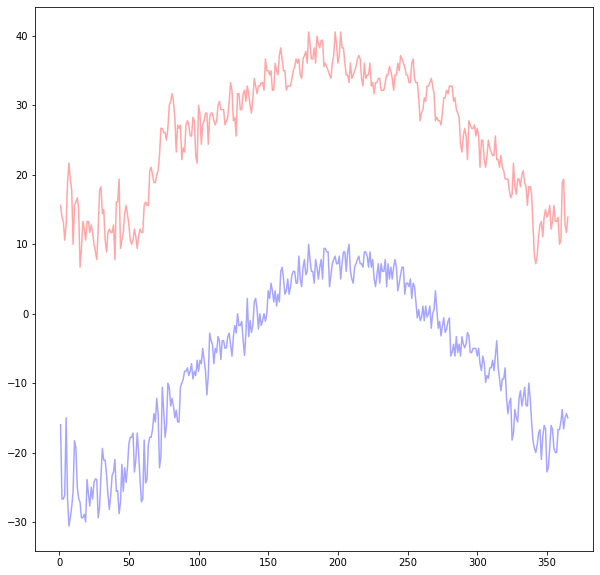

In [22]:
plt.figure(figsize=(10,10))
plt.plot(low_df['Day of the year'],low_df['Data_Value'],label='Minimum Temperatures from 2005 - 2014',color='#0000ff',alpha=0.35)
plt.plot(high_df['Day of the year'],high_df['Data_Value'],label='Maximum Temperatures from 2005 - 2014',color='#ff0000',alpha=0.35)
plt.show()

## Make the diagram nice

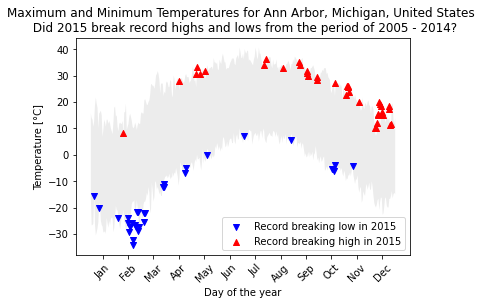

<Figure size 432x288 with 0 Axes>

In [25]:
plt.gca().fill_between(low_df['Day of the year'],low_df['Data_Value'],high_df['Data_Value'],facecolor='gray',alpha=0.15)

#Add Scatter for record breaking
plt.scatter(data_2015_low['Day of the year'],data_2015_low['Lower'],marker='v',color='#0000ff',label='Record breaking low in 2015')
plt.scatter(data_2015_high['Day of the year'],data_2015_high['Higher'],marker='^',color='#ff0000',label='Record breaking high in 2015')

plt.title('Maximum and Minimum Temperatures for Ann Arbor, Michigan, United States \n Did 2015 break record highs and lows from the period of 2005 - 2014?')
plt.ylabel('Temperature [°C]')
plt.xlabel('Day of the year')
plt.legend()

plt.xticks(np.linspace(15,380,13)[:-1], ('Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'))
x = plt.gca().xaxis

#Rotate X-Axis labels
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.show()
plt.savefig('images/weather.png', dpi = 300)